<h2>Statistics</h2>
<br/>
<b>Statistics</b> is a body of methods for collecting and analyzing data to answer a given research problem

Statistics provides methods for

1. Design: Planning and carrying out <b>research studies</b>.
2. Description: Summarizing and exploring data.
3. Inference: Making predictions and generalizing about phenomena represented by the data.

The context of statistics can be illustraed using the image below


<img src="img/stats_pop_vs_sample.png" width="400px"/>

Statistics aim to gain <b>reliable</b> insights or conclusions about an entire phenomenon 
based a <b>couple of observations </b>

Statistics can be grouped in two parts:<br/><br/>
      1. <b>Descriptive Statistics</b> that summarise and explore data<br/>
      2. <b>Inferential Statistics</b> that makes predictions and generalisation
        about phenomenon represented by the data

<h2>Descriptive Statistics</h2><br/>
 Descriptive Statistics consist of methods for organizing and summarizing information. It includes the construction of <b>graphs</b>, <b>charts</b>, and <b>tables</b>, and the <b>calculation</b> of various <b>descriptive measures</b> such as <b>averages</b>, <b>measures of variation</b>, and <b>percentiles</b>.

<h3>Important Terminologies</h3><br/>
(1) A <b>parameter </b> is an <b>unknown</b> numerical summary of the <b>population</b>. A <b>statistic</b> is a <b>known</b> numerical summary of the sample which can be used to make inference about parameters

<img src="img/example_stats.png" width="600px"/>

(2) A <b>characteristic</b> that varies from one person or thing to another is called a
<b>variable</b>, i.e, a variable is any characteristic that varies from one individual
member of the population to another. Examples of variables for humans height, weight, number of siblings, sex, marital status, and eye color.

(3) A <b>variable</b> can either be <b>quantitative</b> (can be counted) or <b>qualitative/categorical</b> (cannot be counted)

(4) A quantative variable can be either <b>continuous</b> (real number) or <b>discrete</b> (ordered whoel number)

(5) Observing the values of the variables for one or more people or things yield
<b>data</b>. Each individual piece of data is called an <b>observation</b> and the collection
of all observations for particular variables is called a <b>data set</b> or <b>data matrix</b>

<h2>Importing Data into Python</h2> <br/>
  The Pandas library is commonly used to import data into the Python Scientific Environment.
  

In [56]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd


df = pd.read_csv('datasets/Healthcare-Diabetes.csv')#load dataframe
df.head()



,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [57]:
import warnings 
warnings. filterwarnings('ignore')

import pandas as pd

df = pd.read_csv('datasets/Healthcare-Diabetes.csv') #loading data into a dataframe

def age_grouping(age):
    if age < 20:
        group = 'teenager'
    elif age < 40:
        group = 'adult'
    else:
        group = 'old-person'
    return group

df['age-group'] = df['Age'].apply(age_grouping)
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,age-group
0,1,6,148,72,35,0,33.6,0.627,50,1,old-person
1,2,1,85,66,29,0,26.6,0.351,31,0,adult
2,3,8,183,64,0,0,23.3,0.672,32,1,adult
3,4,1,89,66,23,94,28.1,0.167,21,0,adult
4,5,0,137,40,35,168,43.1,2.288,33,1,adult


<h3>Summary Statistics</h3>

<ul>
    <li> Measures of central tendency 
    <ul> <li>average</li><li>median</li><li>mode (for qualitative variables)</li></ul></li>     
</ul>

   

<b> 1. Finding the mean </b>

In [67]:
age_list = df['Age'].tolist()

mean_age = df['Age'].mean()
median_age = df['Age'].median()
print('Mean - Age:',mean_age, 'Median - Age:', median_age)




Mean - Age: 33.13222543352601 Median - Age: 29.0


In [17]:
mean_series = df.mean()
mean_dicts = {}

for i in range(len(mean_series)):
    mean_dicts[mean_series.index.tolist()[i]] = [mean_series[i]]

mean_df  = pd.DataFrame(data=mean_dicts)
mean_df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1384.5,3.742775,121.102601,69.134393,20.824422,80.12789,32.137392,0.471193,33.132225,0.343931


<b>2. Finding the median</b>

In [18]:
median_series = df.median()
median_dicts = {}

for i in range(len(median_series)):
    median_dicts[median_series.index.tolist()[i]] = [median_series[i]]

median_df  = pd.DataFrame(data=median_dicts)
median_df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1384.5,3.0,117.0,72.0,23.0,37.0,32.2,0.375,29.0,0.0


adult         2035
old-person     733
Name: age-group, dtype: int64

<b>3. Finding the mode</b>

In [68]:
df['age-group'].value_counts()

adult         2035
old-person     733
Name: age-group, dtype: int64

In [70]:
df['age-group'].mode()[0]

'adult'

<b>Measures of dispersion</b>

<ul>
    <li> Measures of dispersion
    <ul> <li>variance</li><li>standard deviation</li><li>interquartile range</li></ul></li>
     
</ul>


$$var_x = \frac{\sum_{i=1}^{n}(x_i-mean(x))^2}{n-1}$$

$$std_x = \sqrt{var_x}$$

<img src="img/iqr.png"/>

<b>Second quartile</b> = Q2 = The middle value/median of the dataset <br/>
<b>First quartile</b> = Q1 = The middle value of the lower half of the dataset <br/>
<b>Third quartile</b> = Q3 = The middle value of the upper half of the dataset <br/>

In [74]:
var_age = df['Age'].var()
std_age = df['Age'].std()

print("variance of age:",var_age)
print("standard of age:",std_age)

variance of age: 138.70314618407355
standard of age: 11.777229987737929


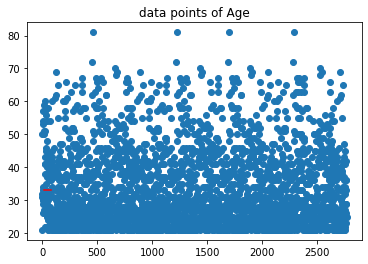

In [94]:
import matplotlib.pyplot as plt
import numpy as np

age_n = df['Age'].tolist()
n = len(df)
mean_age = df['Age'].mean()

min_a = df['Age'].min()
max_a = df['Age'].max()
r_a  = max_a-min_a


a_n = np.arange(min_a,max_a,step=r_a/100)
n_elt = len(a_n)
av_line = np.array([mean_age]*n_elt)

plt.figure()
plt.scatter(np.arange(0,n),age_n)
plt.plot(a_n,av_line,color="r")
plt.title('data points of Age')
plt.show()


<ul>
    <li> Additional statistics 
    <ul> <li>Minimum</li><li>maximum</li></ul></li>
     
</ul>

<b>5-Number Summary Stats</b> = Min , Q1, Q2, Q3, Max

In [96]:
df['Age'].quantile([0.25,0.5,0.75])

0.25    24.0
0.50    29.0
0.75    40.0
Name: Age, dtype: float64

<h3>Summary Graphs</h3>

<ul>
    <li>Box plot</li>
    <li>Pie Chart</li>
    <li>Histogram</li>
    <li>Scatter Plot</li>
</ul>

<h4>Boxplot</h4> <br/>

Summarises the variable

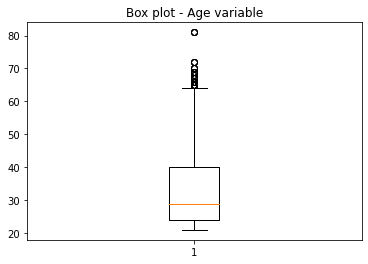

In [45]:
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(df['Age'])
plt.title('Box plot - Age variable')
plt.show()

<b>Outlier detection</b><br/><br/>
Lower Bound = $$Q1-1.5IQR$$
Upper Bound = $$Q3+1.5IQR$$
Any value outside these bounds are considered <b>outliers</b>

<h4>Pie Chart</h4>


In [100]:
count_values = df['age-group'].value_counts().tolist()

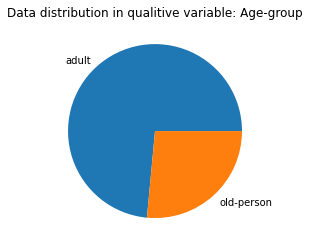

In [102]:
import matplotlib.pyplot as plt


#df['age-group'].value_counts()

plt.figure()
plt.pie(count_values,labels=["adult","old-person"])
plt.title('Data distribution in qualitive variable: Age-group')
plt.show()


<h3>Scatter plot</h3>
<br/>
It is a 2D graph that is commonly used to look at the correlation or proportionality or relationship between two variables

In [103]:
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'age-group'],
      dtype='object')

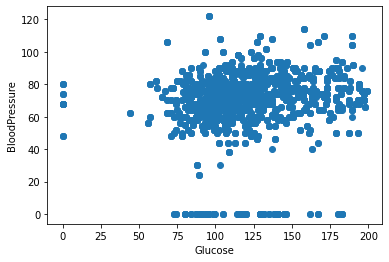

In [104]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['Glucose'],df['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

<h3>Measuring (value) distribution</h3>


<b>The Histogram</b>

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
 10  age-group                 2768 non-null   object 
dtypes: float64(2), int64(8), object(1)
memory usage: 238.0+ KB


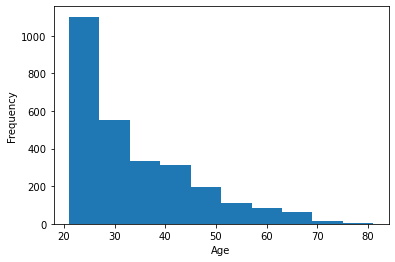

In [105]:
import matplotlib.pyplot as plt


plt.figure()
plt.hist(df['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<b>The Probability density function: pdf(x) = P(x)</b>

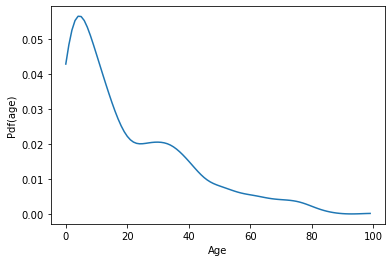

In [108]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

density_dist = gaussian_kde(df['Age'])


x_min = df['Age'].min()
x_max = df['Age'].max()
r_x = x_max - x_min
x_n = np.arange(x_min,x_max,step=r_x/100)


d_x = density_dist(x_n) #estimtate the probability density function of the data

plt.figure()
plt.plot(d_x)
plt.xlabel('Age')
plt.ylabel('Pdf(age)')
plt.show()


<h4>Types of Probability Distribution</h4>
<br/>
There are many probability density function based on the distribution of outcome of the probability variable or experiment

<img src="" alt="Rabbit hole"/>

<ul>
    <li>Gaussian distribution</li>
    <li>Uniform distribution</li>
    <li>Binomial distribution</li>
    <li>etc.</li>
</ul>

<h3>Gaussian distribution</h3>

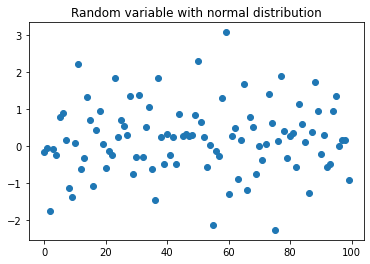

In [15]:
import matplotlib.pyplot as plt
import numpy as np

mu = 0
sigma = 1
N = 100 #number of events
x_var = np.random.normal(loc=mu,scale=sigma,size=N)

plt.figure()
plt.scatter(np.arange(0,N),x_var)
plt.title('Random variable with normal distribution')
plt.show()


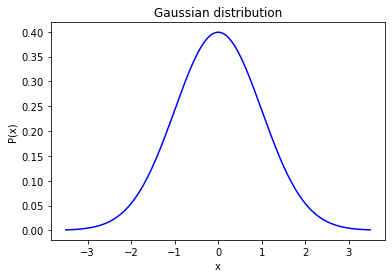

In [8]:

import scipy.stats as st
import pandas as pd


x = np.arange(-3.5,3.5,step=0.01)
pdf = st.norm.pdf(x,loc=mu,scale=sigma)

plt.figure()
plt.plot(x,pdf,color="b")
plt.title("Gaussian distribution: Pd(x)")
plt.xlabel('x')
plt.ylabel('P(x)')
plt.show()

<b>Cumulative Density Function: cdf =  P(x < a)</b>

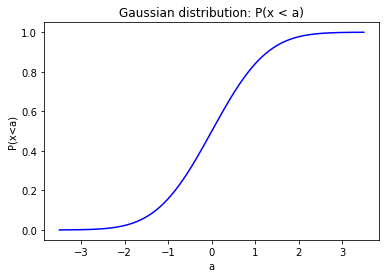

In [10]:
cdf = st.norm.cdf(x,loc=mu,scale=sigma)

plt.figure()
plt.plot(x,cdf,color="b")
plt.title("Gaussian distribution: P(x < a)")
plt.xlabel('a')
plt.ylabel('P(x<a)')
plt.show()

<h3>Scatter plot</h3>